In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
get_ipython().run_line_magic('matplotlib', 'inline')
from scipy import optimize

In [88]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [89]:
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [91]:
df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension', 'No-show': 'noshow' }, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'noshow'],
      dtype='object')


In [92]:
df.columns = df.columns.str.lower()

In [93]:
df.appointmentday = df.appointmentday.apply(np.datetime64)
df.scheduledday = df.scheduledday.apply(np.datetime64)

print(df.appointmentday.head())
print(df.scheduledday.head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: appointmentday, dtype: datetime64[ns]
0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: scheduledday, dtype: datetime64[ns]


In [94]:
# Adding column for days
df['day'] = df.appointmentday.dt.weekday_name

In [95]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday


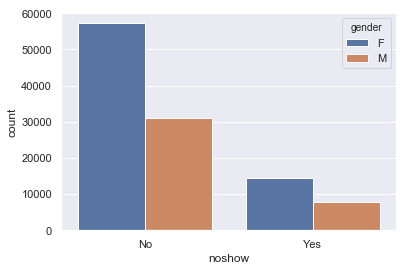

In [96]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='noshow',hue='gender',data=df)

In [97]:
df.groupby('gender')['noshow'].value_counts().unstack()

noshow,No,Yes
gender,,
F,57246,14594
M,30962,7725


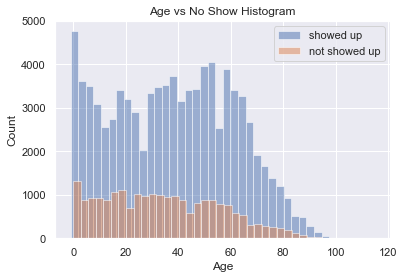

In [98]:
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
df.age[showed_up].hist(label = 'showed up', alpha = 0.5, bins = 40)
df.age[not_showed_up].hist(label = 'not showed up', alpha = 0.5, bins =40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs No Show Histogram')
plt.legend();

        hypertension  diabetes  alcoholism  handicap
gender                                              
F              15339      5606        1223      1404
M               6462      2337        2137      1055


Text(0.5, 0, 'Count of patients')

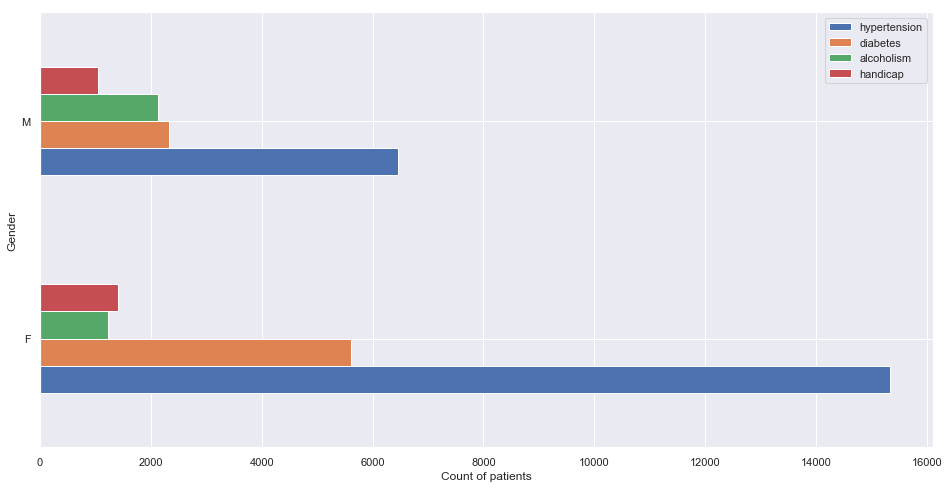

In [99]:
reason=df[['gender','hypertension', 'diabetes', 'alcoholism', 'handicap']].groupby(['gender']).sum()
reason_plot=df[['gender','hypertension', 'diabetes', 'alcoholism', 'handicap']].groupby(['gender']).sum().plot(kind='barh',figsize=(16,8))
print(reason)
plt.ylabel("Gender")
plt.xlabel("Count of patients")

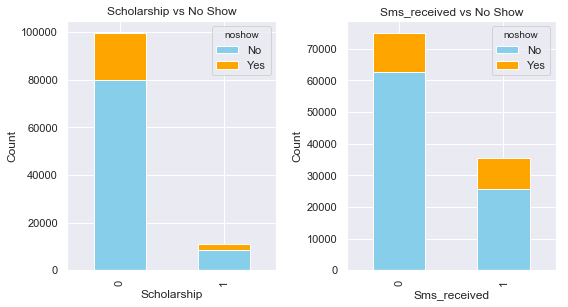

In [80]:
column_plot = ['scholarship', 'sms_received'] 
               

fig = plt.figure(figsize= (8,12))
for number, column in enumerate(column_plot):
    axes = fig.add_subplot(3,2, number+1)
    axes.set_title(column.capitalize() + ' vs No Show')
    pd.crosstab(index = df[column], columns = df['noshow']).plot(kind = 'bar',
                                                                           stacked = True, 
                                                                           ax = axes, 
                                                                          color = ['skyblue','orange'])
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Count')
    
plt.tight_layout()

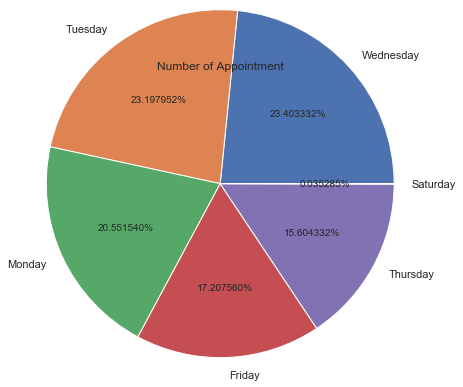

In [100]:
df['day'].value_counts().plot(kind = 'pie', radius=2, autopct='%00f%%');
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Number of Appointment');

In [101]:
days = pd.crosstab(index = df['day'],
           columns = df['noshow'])
days

noshow,No,Yes
day,,
Friday,14982,4037
Monday,18025,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


In [102]:
neighbor = pd.crosstab(index=df["neighbourhood"], 
            columns=df["noshow"])
neighbor_sort = neighbor.sort_values('No', ascending= False)


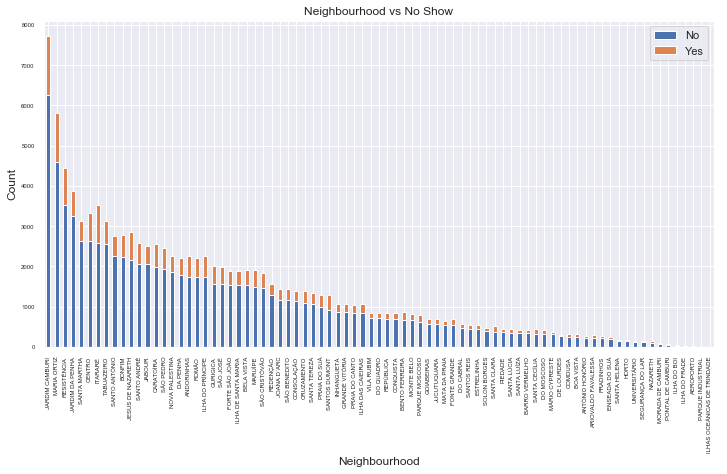

In [86]:
neighbor_sort.plot(kind='bar',figsize = (12,6), fontsize = 6,
                                     stacked = True)

plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood vs No Show')

plt.legend();

In [44]:
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [47]:
## drop columns
df.drop(['patientid', 'appointmentid','scheduledday',
         'appointmentday','neighbourhood'], axis = 1, inplace = True)

In [48]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,day
0,F,62,0,1,0,0,0,0,No,Friday
1,M,56,0,0,0,0,0,0,No,Friday
2,F,62,0,0,0,0,0,0,No,Friday
3,F,8,0,0,0,0,0,0,No,Friday
4,F,56,0,1,1,0,0,0,No,Friday


In [49]:
# copy data set
df_2 = df.copy()

In [50]:
column_plot = ['gender', 'scholarship', 
               'hypertension',
               'diabetes', 
               'alcoholism', 
               'handicap', 
               'sms_received',
               'day',
               'noshow']

In [51]:
# change columns to category type using for loop
for cl in column_plot:
    df_2[cl] = df_2[cl].astype('category')


In [56]:
# 1 for showed up, and 0 for not showed up
df_2['noshow'] = df_2.noshow.map({'No':1, 'Yes':0})

In [57]:
df_3 = pd.get_dummies(df_2, columns = ['gender',  'handicap', 'day'], drop_first = True)

In [58]:
df_3.head()

,age,scholarship,hypertension,diabetes,alcoholism,sms_received,noshow,gender_M,handicap_1,handicap_2,handicap_3,handicap_4,day_Monday,day_Saturday,day_Thursday,day_Tuesday,day_Wednesday
0,62,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_3.drop('noshow',axis=1), 
                                                    df_3['noshow'], test_size=0.30, 
                                                    random_state=101)

In [62]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train);

C:\Users\balaj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
predictions = logit_model.predict(X_test)

In [64]:
print(classification_report(y_test,predictions));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6597
           1       0.80      1.00      0.89     26562

   micro avg       0.80      0.80      0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.64      0.80      0.71     33159



C:\Users\balaj\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\balaj\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\balaj\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
confusion_matrix(y_test, predictions)

array([[    0,  6597],
       [    0, 26562]], dtype=int64)

In [68]:
accuracy_score(y_test, predictions)

0.8010494888265629

In [70]:
# percent of patient who show up and not show up from data
df.noshow.value_counts()/df.noshow.value_counts().sum()

No     0.798067
Yes    0.201933
Name: noshow, dtype: float64